In [46]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
from scipy.stats import gaussian_kde

In [47]:
import riskModelPercept as model

In [48]:
theta0 = 0.8#np.linspace(0.001, 1.99*np.pi, 500)

1.53837832075331

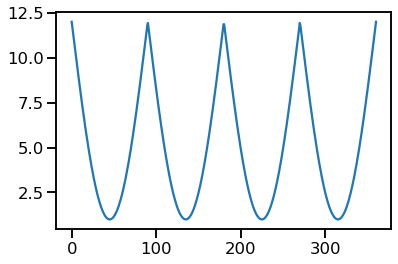

In [50]:
plt.plot(model.stim_grid*180/np.pi, model.value_function_ori(model.stim_grid, type = "prior"))
model.value_function_ori((54./180.)*np.pi, type = "prior")

In [51]:
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[0, ...])
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[50, ...])
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[99, ...])

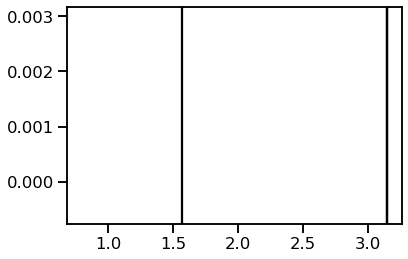

In [52]:
E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.5, 0.01)
plt.plot(theta0, theta0 - E_theta_given_theta0)

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.01, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')
plt.axvline(0.5*np.pi, c='k')


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.75, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')

In [53]:
sigma_stim = 0.02*np.pi
sigma_rep = 0.01


In [54]:
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim, sigma_rep))[0, ...])

In [55]:
safe_value, safe_prob = model.safe_value_dist((22./180.)*np.pi, sigma_stim, sigma_rep , type = "prior", bins=100)

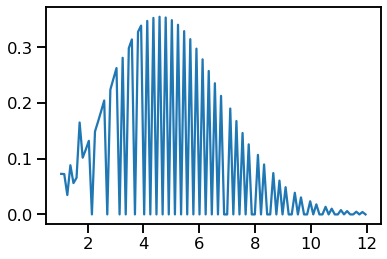

In [56]:
plt.plot(safe_value,safe_prob[0,:])

In [57]:
def plot_safeVal(theta0, sigma_stim, sigma_rep):
    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type = "linearPrior", bins=100)
    plt.plot(safe_value,safe_prob[0,:])


In [58]:
interact(plot_safeVal, theta0 = ((0./180.)*np.pi, (45./180.)*np.pi, 1./180.*np.pi), sigma_stim = ((0.1/180.0)*np.pi, (3./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.1/180.0)))

interactive(children=(FloatSlider(value=0.3839724354387525, description='theta0', max=0.7853981633974483, step…

<function __main__.plot_safeVal(theta0, sigma_stim, sigma_rep)>

In [59]:
risky_value, risky_prob = model.risky_value_dist((45.0/180.)*np.pi, sigma_stim, sigma_rep , risk_prob = 0.75, type = "inverseLinearPrior", bins=100) 

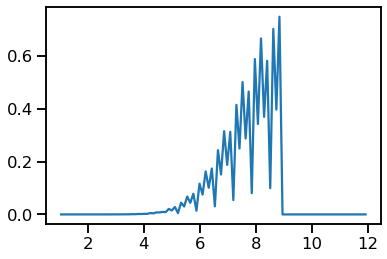

In [60]:
plt.plot(risky_value,risky_prob[0,:])

In [61]:
def plot_riskyVal(theta1, sigma_stim, sigma_rep):
    risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob = 0.75, type = "prior", bins=100)
    plt.plot(risky_value,risky_prob[0,:])

In [62]:
interact(plot_riskyVal, theta1 = ((0./180.)*np.pi, (45./180.)*np.pi, 1./180.*np.pi), sigma_stim = ((0.1/180.0)*np.pi, (3./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.1/180.0)))

interactive(children=(FloatSlider(value=0.3839724354387525, description='theta1', max=0.7853981633974483, step…

<function __main__.plot_riskyVal(theta1, sigma_stim, sigma_rep)>

In [63]:
model.diff_dist(safe_value, risky_prob, safe_prob)

array([[0.8798762]])

# Prior

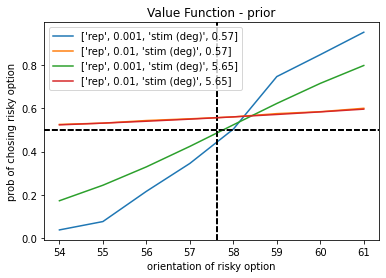

In [52]:
rangePrior1 = np.linspace(54./180., 61./180., 8)*np.pi
rangePrior2 = np.linspace(61./180., 68./180., 8)*np.pi
rangePrior3 = np.linspace(68./180., 78./180., 11)*np.pi
rangePrior4 = np.linspace(78./180., 88./180., 11)*np.pi

rangeOri = rangePrior1

sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_safe_list = [0.001, 0.01]
risk_prob = 0.75
type = "prior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_safe_list:
        
        # Now different sigma for risk and safe representation possible
        sigma_risk = 3*sigma_rep

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=1000)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_risk , risk_prob, type, bins=1000) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - prior")
    
    

In [ ]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "prior"
        
    rangeOri = np.linspace(54./180., 61./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(61./180., 68./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(68./180., 78./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(78./180., 88./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risky_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - prior")

In [ ]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

In [ ]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "prior"

    rangeOri = np.linspace(54./180., 61./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(61./180., 68./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(68./180., 78./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(78./180., 88./180., 11)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - prior")

In [ ]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

# Linear Prior

In [20]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"
        
    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linearPrior")

In [67]:
rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type="linearPrior", bins=25)

np.shape(safe_prob)

(1, 25)

In [21]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [76]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "linearPrior"

    rangeOri = np.linspace(48./180., 52./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(52./180., 59./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(59./180., 70./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(71./180., 88./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - linear Prior")

In [78]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.00001/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.0069814915409025175, description='sigma_stim', max=0.017453292519943…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

# Inverse Linear Prior

In [75]:
def plot_riskAttitudes(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"
        
    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        
    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    

    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    risky_ori = interp1d(riskyVal, rangeOri)
    rationalEquilibrium = risky_ori(safeVal)*180/np.pi
    plt.axvline(rationalEquilibrium, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
    
    
    
    plt.xlabel("orientation of risky option")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverseLinearPrior")

In [25]:
interact(plot_riskAttitudes, sigma_stim = ((0.1/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudes(sigma_stim, sigma_rep)>

In [70]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(3./180., 7./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(7./180., 14./180., 8)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(14./180., 26./180., 12)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(26./180., 43./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[0], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [71]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.0/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.008726646259971648, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [73]:
def plot_riskAttitudesValue(sigma_stim, sigma_rep):
    risk_prob = 0.75
    type = "inverseLinearPrior"

    rangeOri = np.linspace(83./180., 87./180., 5)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])

    rangeOri = np.linspace(77./180., 83./180., 7)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(65./180., 77./180., 13)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])


    rangeOri = np.linspace(48./180., 65./180., 18)*np.pi
    safe_value, safe_prob = model.safe_value_dist(rangeOri[-1], sigma_stim, sigma_rep , type, bins=25)
    risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_stim , risk_prob, type, bins=25) 
    p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
    safeVal = model.value_function_ori(rangeOri[-1], type)
    riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
    plt.axvline(0, c='k', ls='--')
    plt.axhline(0.5, c='k', ls='--')
    plt.plot(riskyVal - safeVal, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])




    plt.xlabel("Value Difference")
    plt.ylabel("prob of chosing risky option")
    plt.title("Value Function - inverse linear Prior")

In [74]:
interact(plot_riskAttitudesValue, sigma_stim = ((0.00000001/180.0)*np.pi, (1./180.0)*np.pi, (0.1/180.0)*np.pi), sigma_rep = ((0.1/180.0), (3./180.0), (0.2/180.0)))

interactive(children=(FloatSlider(value=0.006981317182510244, description='sigma_stim', max=0.0174532925199432…

<function __main__.plot_riskAttitudesValue(sigma_stim, sigma_rep)>

In [31]:
# Inverse Linear Prior

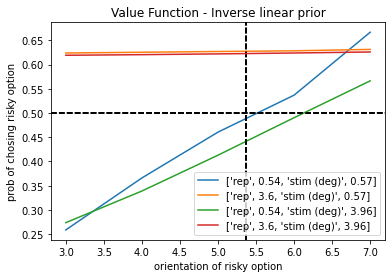

In [58]:
rangeInverseLinear1 = np.linspace(3./180., 7./180., 5)*np.pi
rangeInverseLinear2 = np.linspace(7./180., 14./180., 8)*np.pi
rangeInverseLinear3 = np.linspace(14./180., 26./180., 12)*np.pi
rangeInverseLinear4 = np.linspace(26./180., 43./180., 18)*np.pi

rangeOri = rangeInverseLinear1

sigma_stim_list = [0.001*np.pi,0.007*np.pi]
sigma_rep_list = [0.003, 0.02]
risk_prob = 0.75
type = "inverseLinearPrior"

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:
        
        sigma_risk_rep = 3*sigma_rep

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], sigma_stim, sigma_rep , type, bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri), sigma_stim, sigma_risk_rep , risk_prob, type, bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        safeVal = model.value_function_ori(rangeOri[0], type)
        riskyVal = risk_prob*model.value_function_ori(rangeOri, type)
        risky_ori = interp1d(riskyVal, rangeOri)
        rationalEquilibrium = risky_ori(safeVal)*180/np.pi
        plt.axvline(rationalEquilibrium, c='k', ls='--')
        plt.axhline(0.5, c='k', ls='--')
        plt.plot(rangeOri*180.0/np.pi, np.squeeze(p_chose_risky), label=['rep',sigma_rep*180., "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - Inverse linear prior")
    
    